In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import datetime

from kiblib.utils.db import DbConn

In [76]:
db_conn = DbConn().create_engine()

In [77]:
query = """
SELECT * FROM statdb.stat_issues
WHERE location != 'MED0A' AND YEAR(issuedate) >= 2019
"""
prets = pd.read_sql(query, con=db_conn)

In [79]:
len(prets)

1152698

In [80]:
prets.columns

Index(['issuedate', 'date_due', 'returndate', 'renewals', 'branch',
       'arret_bus', 'borrowernumber', 'cardnumber', 'age', 'sexe', 'ville',
       'id_ic2n', 'iris', 'branchcode', 'categorycode', 'fidelite',
       'itemnumber', 'homebranch', 'location', 'ccode', 'ccode_old',
       'itemcallnumber', 'itemtype', 'publicationyear', 'biblionumber',
       'dateaccessioned', 'cle', 'timestamp', 'issue_id', 'returnbranch'],
      dtype='object')

In [81]:
for c in ['issuedate', 'date_due', 'returndate']:
    prets[c] = pd.to_datetime(prets[c])

In [82]:
prets['duree'] = prets['returndate'] - prets['issuedate']
prets['duree'] = prets['duree'].dt.days
prets['retard'] = prets['returndate'] - prets['date_due']
prets['retard'] = prets['retard'].dt.days

In [83]:
data = prets[prets['duree'] > 0]

In [84]:
len(data)

1074428

/home/kibini/miniconda3/envs/kibini/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

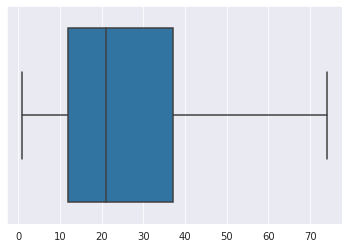

In [85]:
sns.boxplot(data['duree'].to_list(), showfliers=False)

/home/kibini/miniconda3/envs/kibini/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

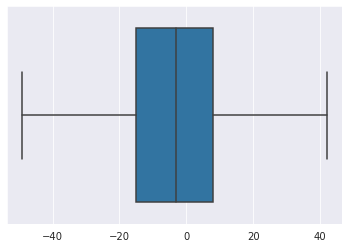

In [86]:
sns.boxplot(data['retard'].to_list(), showfliers=False)

In [87]:
prets['isretard'] = False
prets.loc[prets['retard'] > 0, 'isretard'] = True

In [88]:
prets['isretard'].value_counts(normalize=True)

False    0.667881
True     0.332119
Name: isretard, dtype: float64

In [89]:
prets_retard = prets[prets['isretard'] == True]
prets_retard['annee'] = prets_retard['issuedate'].dt.year
prets_retard['annee'] = prets_retard['annee'].astype(str)

/tmp/ipykernel_32254/2292882429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prets_retard['annee'] = prets_retard['issuedate'].dt.year
/tmp/ipykernel_32254/2292882429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prets_retard['annee'] = prets_retard['annee'].astype(str)


<AxesSubplot:xlabel='retard', ylabel='annee'>

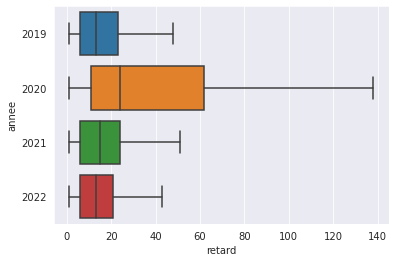

In [96]:
sns.boxplot(data=prets_retard, x='retard', y='annee', showfliers=False)

<AxesSubplot:xlabel='retard'>

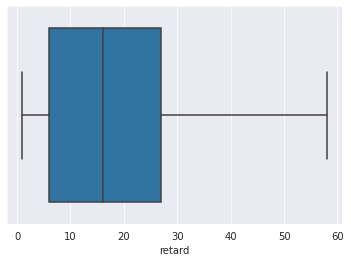

In [97]:
sns.boxplot(data=prets_retard, x='retard', showfliers=False)

<AxesSubplot:xlabel='retard', ylabel='Count'>

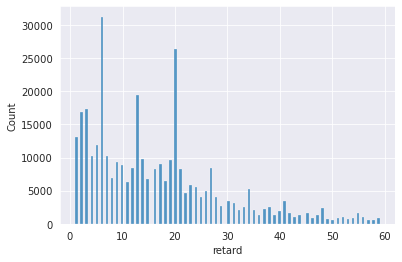

In [100]:
sns.histplot(data=prets_retard[prets_retard['retard'] < 60], x='retard')